#KNN

In [90]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate a simple dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.01, random_state=42)

# Create a pandas DataFrame
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y

# Display the first few rows of the dataset
display(df.head())

,feature1,feature2,target
0,1.228312,-0.757178,0
1,0.698409,-1.380295,0
2,2.548817,2.502258,1
3,0.573579,-1.352979,0
4,0.585900,-1.337457,0


In [91]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df[['feature1', 'feature2']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (80, 2)
Testing set shape: (20, 2)


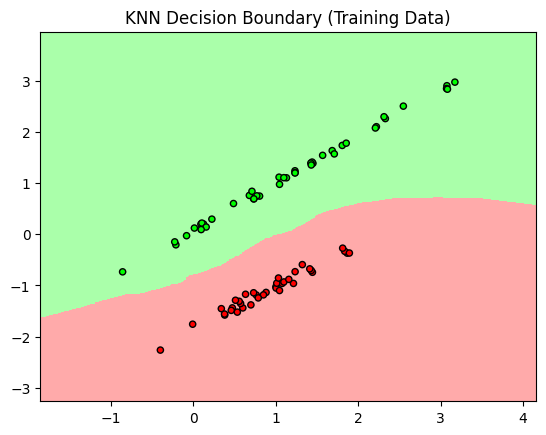

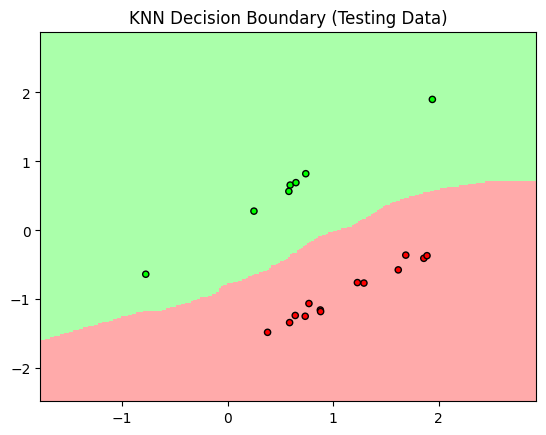

In [92]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd # Import pandas

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    h = .02  # step size in the mesh
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Convert numpy array back to DataFrame with feature names before predicting
    X_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['feature1', 'feature2'])
    Z = classifier.predict(X_plot)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Visualize the training set predictions
plot_decision_boundary(X_train.values, y_train.values, knn, "KNN Decision Boundary (Training Data)")

# Visualize the testing set predictions
plot_decision_boundary(X_test.values, y_test.values, knn, "KNN Decision Boundary (Testing Data)")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


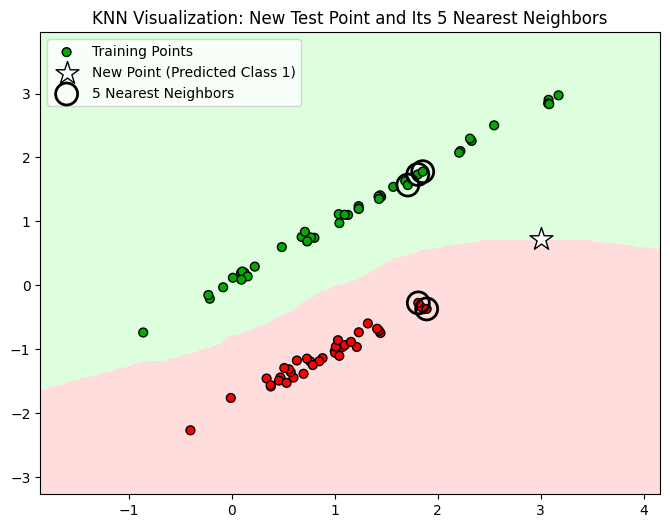

In [93]:
# =============================
# Visualize a distant new point
# =============================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

# Choose a new test point that is slightly far but still near the green cluster
new_point = np.array([[3, 0.73]])  # tweak slightly if needed
predicted_class = knn.predict(new_point)[0]

# Find its 5 nearest neighbors
distances, indices = knn.kneighbors(new_point)
neighbors = X_train.iloc[indices[0]]

# Prepare color maps
h = 0.02
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD']) #0-9 then a to f - 0123456789abcdef where a=10 and f=15
cmap_bold = ListedColormap(['#FF0000', '#00AA00'])

# Create a grid for decision boundaries
x_min, x_max = X_train.values[:, 0].min() - 1, X_train.values[:, 0].max() + 1
y_min, y_max = X_train.values[:, 1].min() - 1, X_train.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on grid
X_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['feature1', 'feature2'])
Z = knn.predict(X_plot)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot training data points
plt.scatter(X_train.values[:, 0], X_train.values[:, 1],
            c=y_train.values, cmap=cmap_bold, edgecolor='k', s=40, label='Training Points')

# Plot the new test point
plt.scatter(new_point[0, 0], new_point[0, 1],
            marker='*', s=300, c='white', edgecolor='black', label=f'New Point (Predicted Class {predicted_class})')

# Circle the 5 nearest neighbors
plt.scatter(neighbors['feature1'], neighbors['feature2'],
            facecolors='none', edgecolors='black', s=250, linewidths=2, label='5 Nearest Neighbors')

# Add text annotation
plt.title("KNN Visualization: New Test Point and Its 5 Nearest Neighbors")
plt.legend(loc='upper left')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


#Some more KNN

## Generate a car-related dataset




In [94]:
# Generate a synthetic dataset related to cars
X, y = make_classification(n_samples=200, n_features=3, n_informative=2, n_redundant=1, n_clusters_per_class=1, random_state=42)

# Create a pandas DataFrame with meaningful column names
df_cars = pd.DataFrame(X, columns=['engine_size', 'weight', 'seating_capacity'])
df_cars['car_type'] = y

# Display the first few rows of the DataFrame
display(df_cars.head())

,engine_size,weight,seating_capacity,car_type
0,0.576216,0.387569,0.970596,1
1,0.810077,-0.303682,0.151085,1
2,-0.099865,-1.185135,-1.766919,0
3,2.038911,-1.365897,-0.479952,0
4,-0.464201,-0.269849,-0.721315,0


## Visualize the dataset

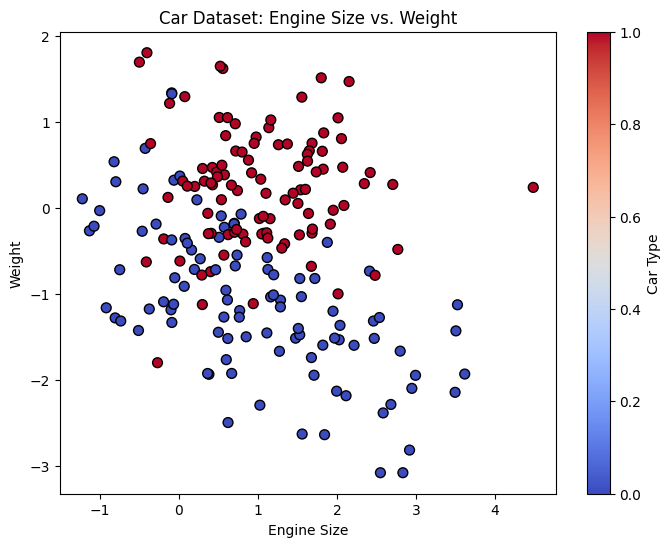

In [95]:
import matplotlib.pyplot as plt

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_cars['engine_size'], df_cars['weight'], c=df_cars['car_type'], cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel('Engine Size')
plt.ylabel('Weight')
plt.title('Car Dataset: Engine Size vs. Weight')
plt.colorbar(label='Car Type')
plt.show()

## Split the dataset



In [96]:
# Separate features (X) and target variable (y)
X = df_cars[['engine_size', 'weight', 'seating_capacity']]
y = df_cars['car_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)

Training set shape (X_train): (160, 3)
Testing set shape (X_test): (40, 3)
Training target shape (y_train): (160,)
Testing target shape (y_test): (40,)


## Implement and visualize knn with different 'k' values


Implement the KNN model and train it on the training data using different values for 'k' (the number of neighbors). Visualize the decision boundaries for each 'k' to show its effect.


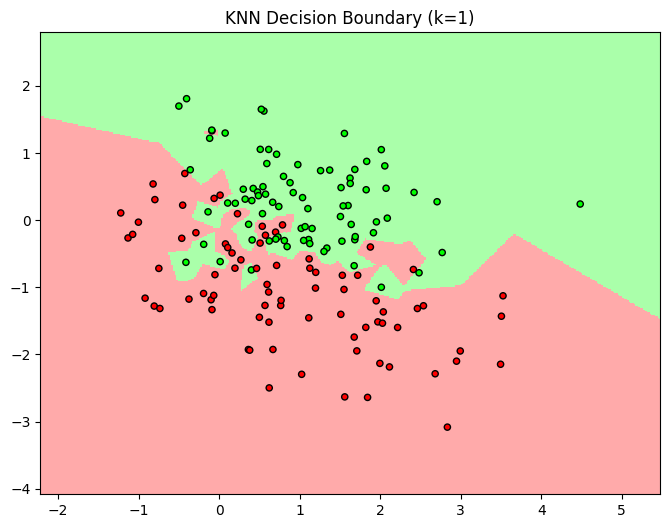

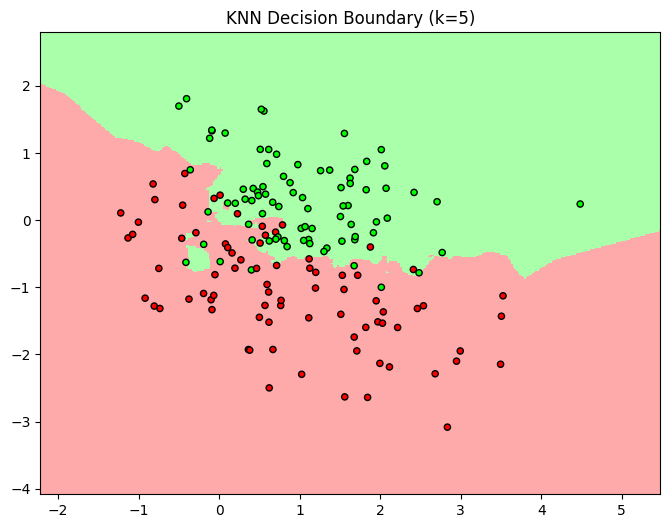

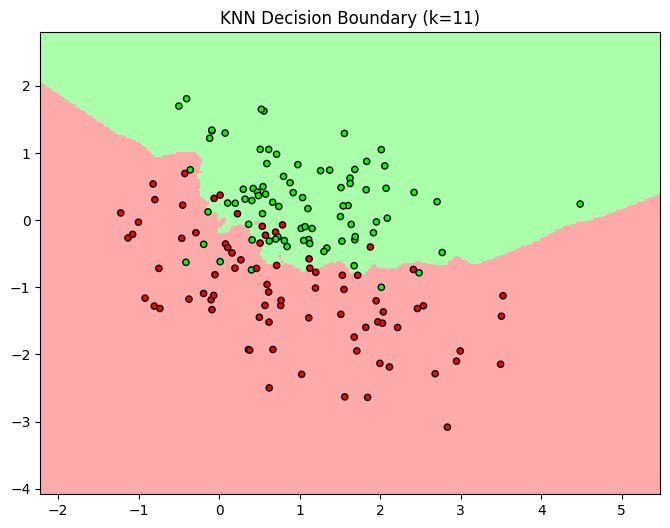

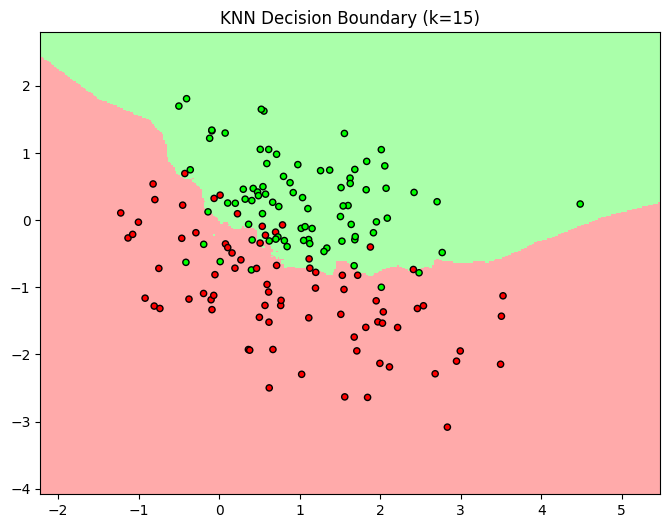

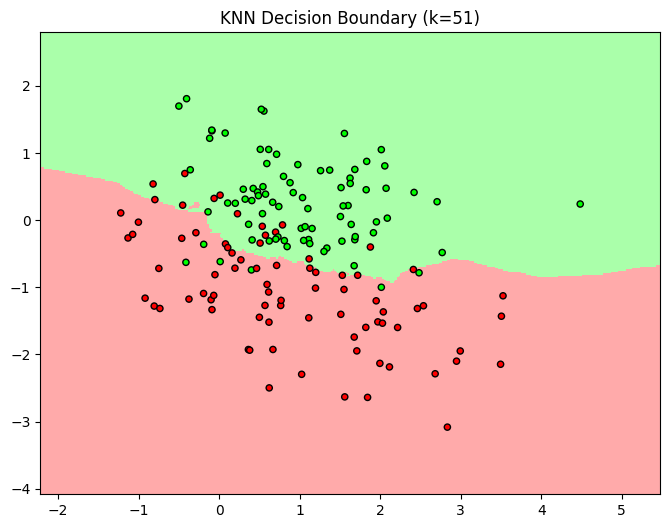

In [104]:
# Define a list of different 'k' values to experiment with
k_values = [1, 5, 11, 15, 51]

# Create a function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    h = .02  # step size in the mesh
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
    y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Convert numpy array back to DataFrame with feature names before predicting
    X_mesh = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
    Z = classifier.predict(X_mesh)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Select only the first two features for training and plotting
X_train_2d = X_train[['engine_size', 'weight']]
X_test_2d = X_test[['engine_size', 'weight']]


# Loop through the defined 'k' values
for k in k_values:
    # Instantiate a KNeighborsClassifier with the current 'k' value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the KNN model using only the first two features
    knn.fit(X_train_2d, y_train)

    # Visualize the decision boundary for the current 'k' using only the first two features
    plot_decision_boundary(X_train_2d, y_train, knn, f"KNN Decision Boundary (k={k})")

## Explain the effect of 'k'

### Subtask:
Briefly explain how changing the value of 'k' impacts the decision boundary and the model's performance.


In [98]:
# Explain the impact of 'k' on the decision boundary and model performance based on the plots

print("Impact of 'k' on Decision Boundaries and Model Performance:")
print("\nVisualizations with different 'k' values show:")

print("\n- Small 'k' (e.g., k=1):")
print("  - Decision boundaries are highly irregular and can be very complex.")
print("  - The model is very sensitive to individual data points (noise).")
print("  - This can lead to overfitting, where the model performs well on the training data but poorly on unseen data.")
print("  - High variance, low bias.")

print("\n- Medium 'k' (e.g., k=5):")
print("  - Decision boundaries are smoother compared to small 'k'.")
print("  - The model is less sensitive to individual noisy data points.")
print("  - This often represents a better balance between capturing the underlying pattern and being robust to noise.")

print("\n- Large 'k' (e.g., k=15):")
print("  - Decision boundaries become very smooth, potentially ignoring finer details in the data.")
print("  - The model is more robust to noise but might oversmooth the boundaries, leading to underfitting.")
print("  - Low variance, high bias.")

print("\nTrade-off between Bias and Variance:")
print("As 'k' decreases (gets smaller), the model's complexity increases. This leads to lower bias (the model can fit the training data more closely) but higher variance (the model is more sensitive to the specific training data and may not generalize well).")
print("As 'k' increases (gets larger), the model's complexity decreases. This leads to higher bias (the model might not capture the nuances in the training data) but lower variance (the model is less sensitive to the specific training data and tends to generalize better).")
print("Choosing an optimal 'k' involves finding a balance that minimizes both bias and variance, often through techniques like cross-validation.")

Impact of 'k' on Decision Boundaries and Model Performance:

Visualizations with different 'k' values show:

- Small 'k' (e.g., k=1):
  - Decision boundaries are highly irregular and can be very complex.
  - The model is very sensitive to individual data points (noise).
  - This can lead to overfitting, where the model performs well on the training data but poorly on unseen data.
  - High variance, low bias.

- Medium 'k' (e.g., k=5):
  - Decision boundaries are smoother compared to small 'k'.
  - The model is less sensitive to individual noisy data points.
  - This often represents a better balance between capturing the underlying pattern and being robust to noise.

- Large 'k' (e.g., k=15):
  - Decision boundaries become very smooth, potentially ignoring finer details in the data.
  - The model is more robust to noise but might oversmooth the boundaries, leading to underfitting.
  - Low variance, high bias.

Trade-off between Bias and Variance:
As 'k' decreases (gets smaller), the mo

## Add a new data point and visualize its prediction

### Subtask:
Introduce a new, unseen data point and visualize how the KNN model predicts its class based on its nearest neighbors.


**Reasoning**:
Select a new data point, predict its class using the trained KNN model, find its nearest neighbors, and visualize the result including the decision boundary, training data, the new point, and its neighbors.



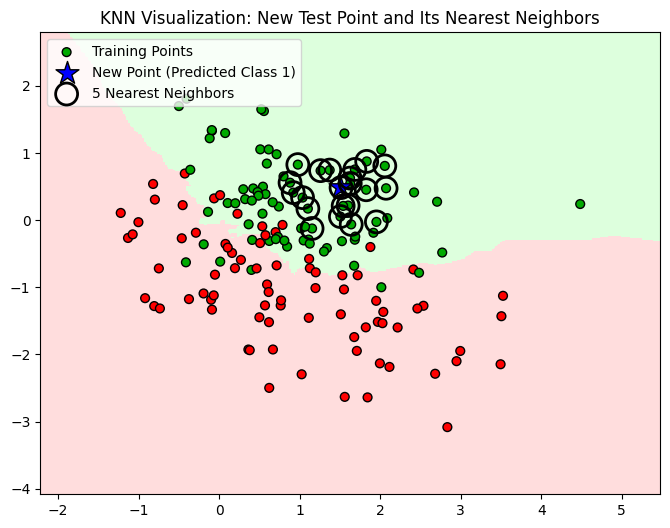

In [99]:
# Select a new test point with 'engine_size' and 'weight' values
new_point = pd.DataFrame([[1.5, 0.5]], columns=['engine_size', 'weight']) # Example point

# Predict the class of the new point
predicted_class = knn.predict(new_point)[0]

# Find the k nearest neighbors of the new point from the training data (X_train_2d)
# Using k=5 as from the previous visualization
k = 5
distances, indices = knn.kneighbors(new_point)
neighbors = X_train_2d.iloc[indices[0]]

# Prepare color maps
h = 0.02
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD'])
cmap_bold = ListedColormap(['#FF0000', '#00AA00'])

# Create a grid for decision boundaries
x_min, x_max = X_train_2d.values[:, 0].min() - 1, X_train_2d.values[:, 0].max() + 1
y_min, y_max = X_train_2d.values[:, 1].min() - 1, X_train_2d.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on grid
X_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['engine_size', 'weight'])
Z = knn.predict(X_plot)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot training data points
plt.scatter(X_train_2d.values[:, 0], X_train_2d.values[:, 1],
            c=y_train.values, cmap=cmap_bold, edgecolor='k', s=40, label='Training Points')

# Plot the new test point
plt.scatter(new_point.values[:, 0], new_point.values[:, 1],
            marker='*', s=300, c='blue', edgecolor='black', label=f'New Point (Predicted Class {predicted_class})')

# Circle the k nearest neighbors
plt.scatter(neighbors['engine_size'], neighbors['weight'],
            facecolors='none', edgecolors='black', s=250, linewidths=2, label=f'{k} Nearest Neighbors')

# Add text annotation
plt.title("KNN Visualization: New Test Point and Its Nearest Neighbors")
plt.legend(loc='upper left')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Explain the prediction for the new point


Explain the steps the KNN model takes to classify the new data point.


In [100]:
# Explain how KNN classifies the new data point

print("How KNN Classified the New Data Point:")
print("\nBased on the visualization, here's how the KNN model classified the new blue star data point:")

print("\n1. Finding the Neighbors:")
print("   - The KNN algorithm looked at the 'k' nearest data points (in this case, k=5) in the training dataset relative to the new point.")
print("   - The plot shows these 5 nearest neighbors circled in black around the new blue star.")
print("   - The distance between the new point and each training point is calculated using the Euclidean distance formula (by default in KNeighborsClassifier). The 5 points with the smallest distances are identified as the nearest neighbors.")

print("\n2. Determining the Class:")
print("   - Once the 5 nearest neighbors were found, the algorithm examined their classes (red or green).")
print("   - The prediction for the new point is made based on a majority vote among these 5 neighbors.")
print("   - In the visualization, you can observe the colors of the circled neighbors to see which class was dominant.")
print("   - If, for example, 3 of the 5 neighbors were green and 2 were red, the new point would be classified as green.")

print(f"\n3. The Prediction:")
print(f"   - As indicated by the label and color of the new point in the plot, the KNN model predicted its class as: {predicted_class}.")
print("   - This prediction is a direct result of the majority class among the 5 nearest neighbors.")

print("\nIn essence, KNN is a 'lazy learner' that doesn't build a complex model during training but instead memorizes the training data and makes predictions based on the similarity (proximity) of new data points to its neighbors.")

How KNN Classified the New Data Point:

Based on the visualization, here's how the KNN model classified the new blue star data point:

1. Finding the Neighbors:
   - The KNN algorithm looked at the 'k' nearest data points (in this case, k=5) in the training dataset relative to the new point.
   - The plot shows these 5 nearest neighbors circled in black around the new blue star.
   - The distance between the new point and each training point is calculated using the Euclidean distance formula (by default in KNeighborsClassifier). The 5 points with the smallest distances are identified as the nearest neighbors.

2. Determining the Class:
   - Once the 5 nearest neighbors were found, the algorithm examined their classes (red or green).
   - The prediction for the new point is made based on a majority vote among these 5 neighbors.
   - In the visualization, you can observe the colors of the circled neighbors to see which class was dominant.
   - If, for example, 3 of the 5 neighbors were g

## Evaluate the knn model


Calculate and display some basic evaluation metrics for the KNN model on the testing set.


In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the classes for the test set X_test_2d
y_pred = knn.predict(X_test_2d)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8000
Precision: 0.8125
Recall: 0.8000
F1-score: 0.7980


Assignment: Change the K values, then look at how the above factors change; if they increase or decrease